In [ ]:
# Each api-key is limited to 10 use a day, can always apply for a new one with a new email address

In [51]:
import requests
import json
import datetime
import matplotlib.pyplot as plt

In [52]:
def get_commute(commute_time=25, arrival_lat=40.75569087755102, arrival_lng=-73.95656948979591):
    # commute_time is within x minutes to the destination
    # uses current time, tried custom time but it seems like api doesn't work well with custom time
    url = "https://api.traveltimeapp.com/v4/time-map"

    payload = json.dumps({
      "arrival_searches": [
        {
          "id": "public transport to Cornell Tech",
          "coords": {
            "lat": arrival_lat,
            "lng": arrival_lng
          },
          "transportation": {
            "type": "public_transport"
          },
          "arrival_time": datetime.datetime.now().isoformat(),
          "travel_time": commute_time * 60,
        }
      ]
    })
    headers = {
      'Host': 'api.traveltimeapp.com',
      'Content-Type': 'application/json',
    #  'Accept': 'application/json',
      'Accept': 'application/vnd.wkt-no-holes+json',
      'X-Application-Id': '590ad7fa',
      'X-Api-Key': '89030570549b1153994ffc2172a4de51'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    return response

In [53]:
BBox = (-74.0049, -73.8560, 40.7154, 40.8008)
#for map around cornell tech

In [54]:
response = get_commute()

In [55]:
splitted = response.json()['results'][0]['shape'][response.json()['results'][0]['shape'].find('('):].split('))')[:-1]

In [56]:
points_x_list = []
points_y_list = []
for val in splitted:
    temp_list = val[3:].split(',')
    temp_list_after = [i.split(' ') for i in temp_list]
    points_x = [float(x[0]) for x in temp_list_after]
    points_y = [float(x[1]) for x in temp_list_after]
    points_x_list.append(points_x)
    points_y_list.append(points_y)

In [57]:
nyc_map = plt.imread('map.jpg')

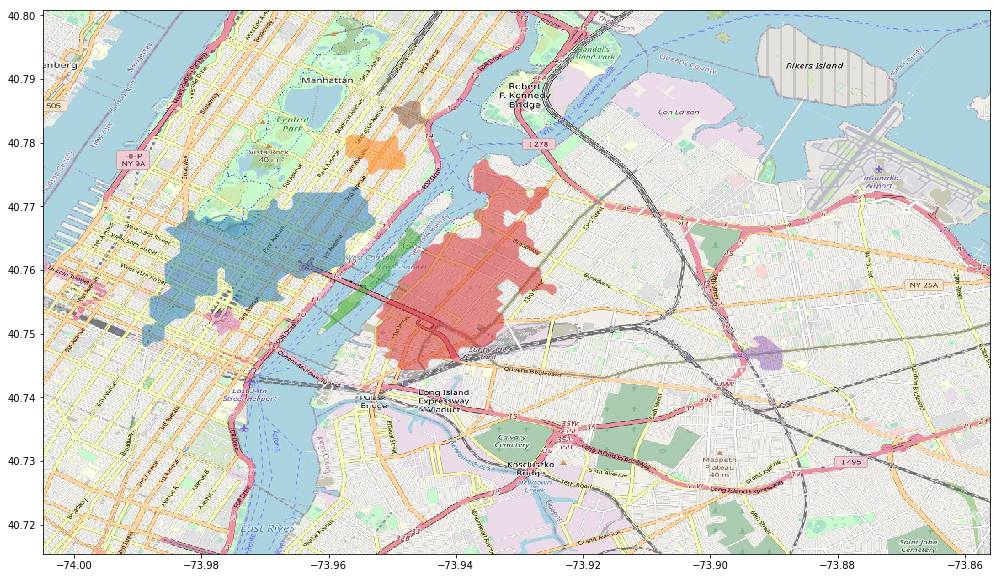

In [58]:
plt.figure(figsize=(20,10))

plt.imshow(nyc_map, extent = BBox)
for ix in range(len(points_x_list)):
    plt.fill(points_x_list[ix], points_y_list[ix], alpha=0.5)